In [5]:
library(Seurat)
library(dplyr)
library(ggplot2)
#library(ggpubr)
load("/Users/yzhou14/Data_local/20200627_scRNAseq_analysis/Colon_0.6_0730.RDS")
#after this step, an object named immune.combined is loaded
# we only choose the singlet for downstream analysis
immune.combined=subset(immune.combined,`DF`=="Singlet")

In [6]:
immune.combined[["celltype0627_stim"]]<- paste(Idents(immune.combined), immune.combined$stim, sep = "_")

In [7]:
Idents(immune.combined)<-"celltype0627"
levels(immune.combined)

[1] "0.IgD+ mature B"      "1.IgM+IgD+ mature B"  "2.CD4+CTLA4+ T"      
 [4] "3.CD4+ Teff"          "4.Myeloid phagocytes" "5.Ly2Z+ Myeloid"     
 [7] "6.IgA+ Plasma B"      "7.Gata3+ ILC2,ILC3"   "8.RORga+ ILC2,ILC3"  
[10] "9.Foxp3+ Treg"        "10.CD8+ T, NKT"       "11.IgD+ mature B"    
[13] "12.Neu"               "13.Proliferating B"   "14.B plasmablast"    
[16] "15.CX3CR1+ Mac"       "16.Epithelial cells"  "17.Endothelial cells"
[19] "18.Fibroblasts"

In [81]:
cytokines=c(
    "Ccl2","Ccl3","Ccl5","Csf1","Cxcl1","Cxcl2",
    "Cxcl9","Cxcl10","Ifng","Il1a","Il1b","Il6","Il15","Il17a",
    "Il22","Lif","Tnf"
)

for (celltype in c('0.IgD+ mature B','1.IgM+IgD+ mature B','2.CD4+CTLA4+ T','3.CD4+ Teff',
    '4.Myeloid phagocytes','5.Ly2Z+ Myeloid','6.IgA+ Plasma B','7.Gata3+ ILC2,ILC3',
    '8.RORga+ ILC2,ILC3','9.Foxp3+ Treg','10.CD8+ T, NKT','11.IgD+ mature B','12.Neu',
    '13.Proliferating B','14.B plasmablast','15.CX3CR1+ Mac')){
    sub=subset(immune.combined, `celltype0627`==celltype)
    Idents(sub) <-"stim"
    bulk=AverageExpression(object=sub, assays="RNA",return.seurat = T,slot="data",verbose=F)
    
    plot=DoHeatmap(bulk, features = cytokines,draw.lines = F, size=5,
          group.colors = c("WTI"="#000000","WTC"="#5C8924","KOI"="#0715e5","KOC"="#8e1098")) +theme(text = element_text(size = 17))#+ 
      #scale_fill_gradientn(colors = colorRampPalette(c("#0000dd", "white", "#dd0000"))(256))+theme(legend.position = "bottom")
  

    
    filename= paste("/Users/yzhou14/Data_local/20200802 with Sijie for fig/",celltype,"_stim_heatmap.pdf",sep="")
    print(filename)    
    pdf(file=filename,width=3.8, height=10)
    print(plot)
    dev.off()
    
}

[1] "/Users/yzhou14/Data_local/20200802 with Sijie for fig/0.IgD+ mature B_stim_heatmap.pdf"
[1] "/Users/yzhou14/Data_local/20200802 with Sijie for fig/1.IgM+IgD+ mature B_stim_heatmap.pdf"
[1] "/Users/yzhou14/Data_local/20200802 with Sijie for fig/2.CD4+CTLA4+ T_stim_heatmap.pdf"
[1] "/Users/yzhou14/Data_local/20200802 with Sijie for fig/3.CD4+ Teff_stim_heatmap.pdf"
[1] "/Users/yzhou14/Data_local/20200802 with Sijie for fig/4.Myeloid phagocytes_stim_heatmap.pdf"
[1] "/Users/yzhou14/Data_local/20200802 with Sijie for fig/5.Ly2Z+ Myeloid_stim_heatmap.pdf"
[1] "/Users/yzhou14/Data_local/20200802 with Sijie for fig/6.IgA+ Plasma B_stim_heatmap.pdf"
[1] "/Users/yzhou14/Data_local/20200802 with Sijie for fig/7.Gata3+ ILC2,ILC3_stim_heatmap.pdf"
[1] "/Users/yzhou14/Data_local/20200802 with Sijie for fig/8.RORga+ ILC2,ILC3_stim_heatmap.pdf"
[1] "/Users/yzhou14/Data_local/20200802 with Sijie for fig/9.Foxp3+ Treg_stim_heatmap.pdf"
[1] "/Users/yzhou14/Data_local/20200802 with Sijie for fig/10.

In [125]:
cytokines=c(
    "Ccl2","Ccl3","Ccl5","Csf1","Cxcl1","Cxcl2",
    "Cxcl9","Cxcl10","Ifng","Il1a","Il1b","Il6","Il15","Il17a",
    "Il22","Lif","Tnf"
)

for (celltype in c('0.IgD+ mature B','1.IgM+IgD+ mature B','2.CD4+CTLA4+ T','3.CD4+ Teff',
    '4.Myeloid phagocytes','5.Ly2Z+ Myeloid','6.IgA+ Plasma B','7.Gata3+ ILC2,ILC3',
    '8.RORga+ ILC2,ILC3','9.Foxp3+ Treg','10.CD8+ T, NKT','11.IgD+ mature B','12.Neu',
    '13.Proliferating B','14.B plasmablast','15.CX3CR1+ Mac')){
    sub=subset(immune.combined, `celltype0627`==celltype)
    Idents(sub) <-"stim"
    bulk=AverageExpression(object=sub, assays="RNA",return.seurat = T,slot="data",verbose=F)
    
    plot=DoHeatmap(bulk, features = cytokines,draw.lines = F, size=5,slot="data",
          group.colors = c("WTI"="#000000","WTC"="#5C8924","KOI"="#0715e5","KOC"="#8e1098")) +theme(text = element_text(size = 17))#+ 
      #scale_fill_gradientn(colors = colorRampPalette(c("#0000dd", "white", "#dd0000"))(256))+theme(legend.position = "bottom")
  

    
    filename= paste("/Users/yzhou14/Data_local/20200802 with Sijie for fig/cytokine heatmap abs/",celltype,"_stim_heatmap.pdf",sep="")
    print(filename)    
    pdf(file=filename,width=3.8, height=10)
    print(plot)
    dev.off()
    
}

[1] "/Users/yzhou14/Data_local/20200802 with Sijie for fig/cytokine heatmap abs/0.IgD+ mature B_stim_heatmap.pdf"
[1] "/Users/yzhou14/Data_local/20200802 with Sijie for fig/cytokine heatmap abs/1.IgM+IgD+ mature B_stim_heatmap.pdf"
[1] "/Users/yzhou14/Data_local/20200802 with Sijie for fig/cytokine heatmap abs/2.CD4+CTLA4+ T_stim_heatmap.pdf"
[1] "/Users/yzhou14/Data_local/20200802 with Sijie for fig/cytokine heatmap abs/3.CD4+ Teff_stim_heatmap.pdf"
[1] "/Users/yzhou14/Data_local/20200802 with Sijie for fig/cytokine heatmap abs/4.Myeloid phagocytes_stim_heatmap.pdf"
[1] "/Users/yzhou14/Data_local/20200802 with Sijie for fig/cytokine heatmap abs/5.Ly2Z+ Myeloid_stim_heatmap.pdf"
[1] "/Users/yzhou14/Data_local/20200802 with Sijie for fig/cytokine heatmap abs/6.IgA+ Plasma B_stim_heatmap.pdf"
[1] "/Users/yzhou14/Data_local/20200802 with Sijie for fig/cytokine heatmap abs/7.Gata3+ ILC2,ILC3_stim_heatmap.pdf"
[1] "/Users/yzhou14/Data_local/20200802 with Sijie for fig/cytokine heatmap abs/8

In [29]:
Idents(sub)<-"stim"
bulk=AverageExpression(object=sub, assays="RNA",return.seurat = T,slot="data",verbose=F)

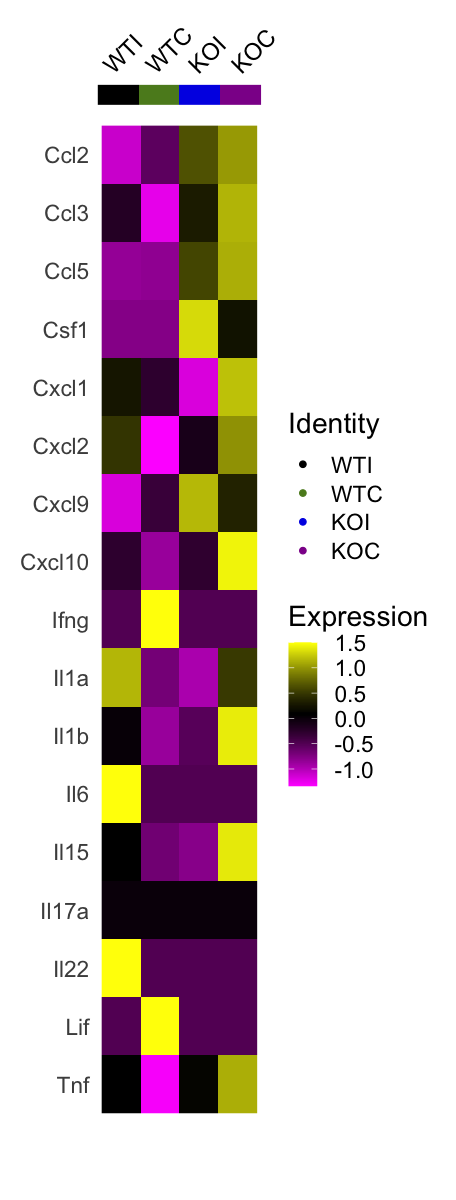

In [80]:

sub@meta.data$stim=factor(sub@meta.data$stim, levels=c("WTI","WTC","KOI","KOC"))
colormap<-c("#8e1098","#0715e5","#5C8924","#000000")

options(repr.plot.width=3.8, repr.plot.height=10, repr.plot.resolution=200)
DoHeatmap(bulk, features = cytokines,draw.lines = F, size=5,
          group.colors = c("WTI"="#000000","WTC"="#5C8924","KOI"="#0715e5","KOC"="#8e1098")) +theme(text = element_text(size = 17))#+ 
#scale_fill_gradientn(colors = colorRampPalette(c("#0000dd", "white", "#dd0000"))(256))+theme(legend.position = "bottom")



In [13]:
library(tictoc)

In [14]:
tic()
Idents(immune.combined)<-"celltype0627_stim"
immune.combined.bulk=AverageExpression(object=immune.combined, assays="RNA",return.seurat = T,slot="data",verbose=F)
toc()

5.779 sec elapsed


In [15]:
immune.combined.bulk

An object of class Seurat 
15709 features across 73 samples within 1 assay 
Active assay: RNA (15709 features, 0 variable features)

In [96]:
levels(immune.combined.bulk)<-c('0.IgD+ mature B_WTI',
'0.IgD+ mature B_WTC',
'0.IgD+ mature B_KOI',
'0.IgD+ mature B_KOC',
'1.IgM+IgD+ mature B_WTI',
'1.IgM+IgD+ mature B_WTC',
'1.IgM+IgD+ mature B_KOI',
'1.IgM+IgD+ mature B_KOC',
'2.CD4+CTLA4+ T_WTI',
'2.CD4+CTLA4+ T_WTC',
'2.CD4+CTLA4+ T_KOI',
'2.CD4+CTLA4+ T_KOC',
'3.CD4+ Teff_WTI',
'3.CD4+ Teff_WTC',
'3.CD4+ Teff_KOI',
'3.CD4+ Teff_KOC',
'4.Myeloid phagocytes_WTI',
'4.Myeloid phagocytes_WTC',
'4.Myeloid phagocytes_KOI',
'4.Myeloid phagocytes_KOC',
'5.Ly2Z+ Myeloid_WTI',
'5.Ly2Z+ Myeloid_WTC',
'5.Ly2Z+ Myeloid_KOI',
'5.Ly2Z+ Myeloid_KOC',
'6.IgA+ Plasma B_WTI',
'6.IgA+ Plasma B_WTC',
'6.IgA+ Plasma B_KOI',
'6.IgA+ Plasma B_KOC',
'7.Gata3+ ILC2,ILC3_WTI',
'7.Gata3+ ILC2,ILC3_WTC',
'7.Gata3+ ILC2,ILC3_KOI',
'7.Gata3+ ILC2,ILC3_KOC',
'8.RORga+ ILC2,ILC3_WTI',
'8.RORga+ ILC2,ILC3_WTC',
'8.RORga+ ILC2,ILC3_KOI',
'8.RORga+ ILC2,ILC3_KOC',
'9.Foxp3+ Treg_WTI',
'9.Foxp3+ Treg_WTC',
'9.Foxp3+ Treg_KOI',
'9.Foxp3+ Treg_KOC',
'10.CD8+ T, NKT_WTI',
'10.CD8+ T, NKT_WTC',
'10.CD8+ T, NKT_KOI',
'10.CD8+ T, NKT_KOC',
'11.IgD+ mature B_WTI',
'11.IgD+ mature B_WTC',
'11.IgD+ mature B_KOI',
'11.IgD+ mature B_KOC',
'12.Neu_WTI',
'12.Neu_WTC',
'12.Neu_KOI',
'12.Neu_KOC',
'13.Proliferating B_WTI',
'13.Proliferating B_WTC',
'13.Proliferating B_KOI',
'13.Proliferating B_KOC',
'14.B plasmablast_WTI',
'14.B plasmablast_WTC',
'14.B plasmablast_KOI',
'14.B plasmablast_KOC',
'15.CX3CR1+ Mac_WTI',
'15.CX3CR1+ Mac_WTC',
'15.CX3CR1+ Mac_KOI',
'15.CX3CR1+ Mac_KOC',
'16.Epithelial cells_WTI',
'16.Epithelial cells_WTC',
'16.Epithelial cells_KOI',
'16.Epithelial cells_KOC',
'17.Endothelial cells_WTI',
'17.Endothelial cells_WTC',
'17.Endothelial cells_KOC',
'18.Fibroblasts_WTI',
'18.Fibroblasts_WTC')

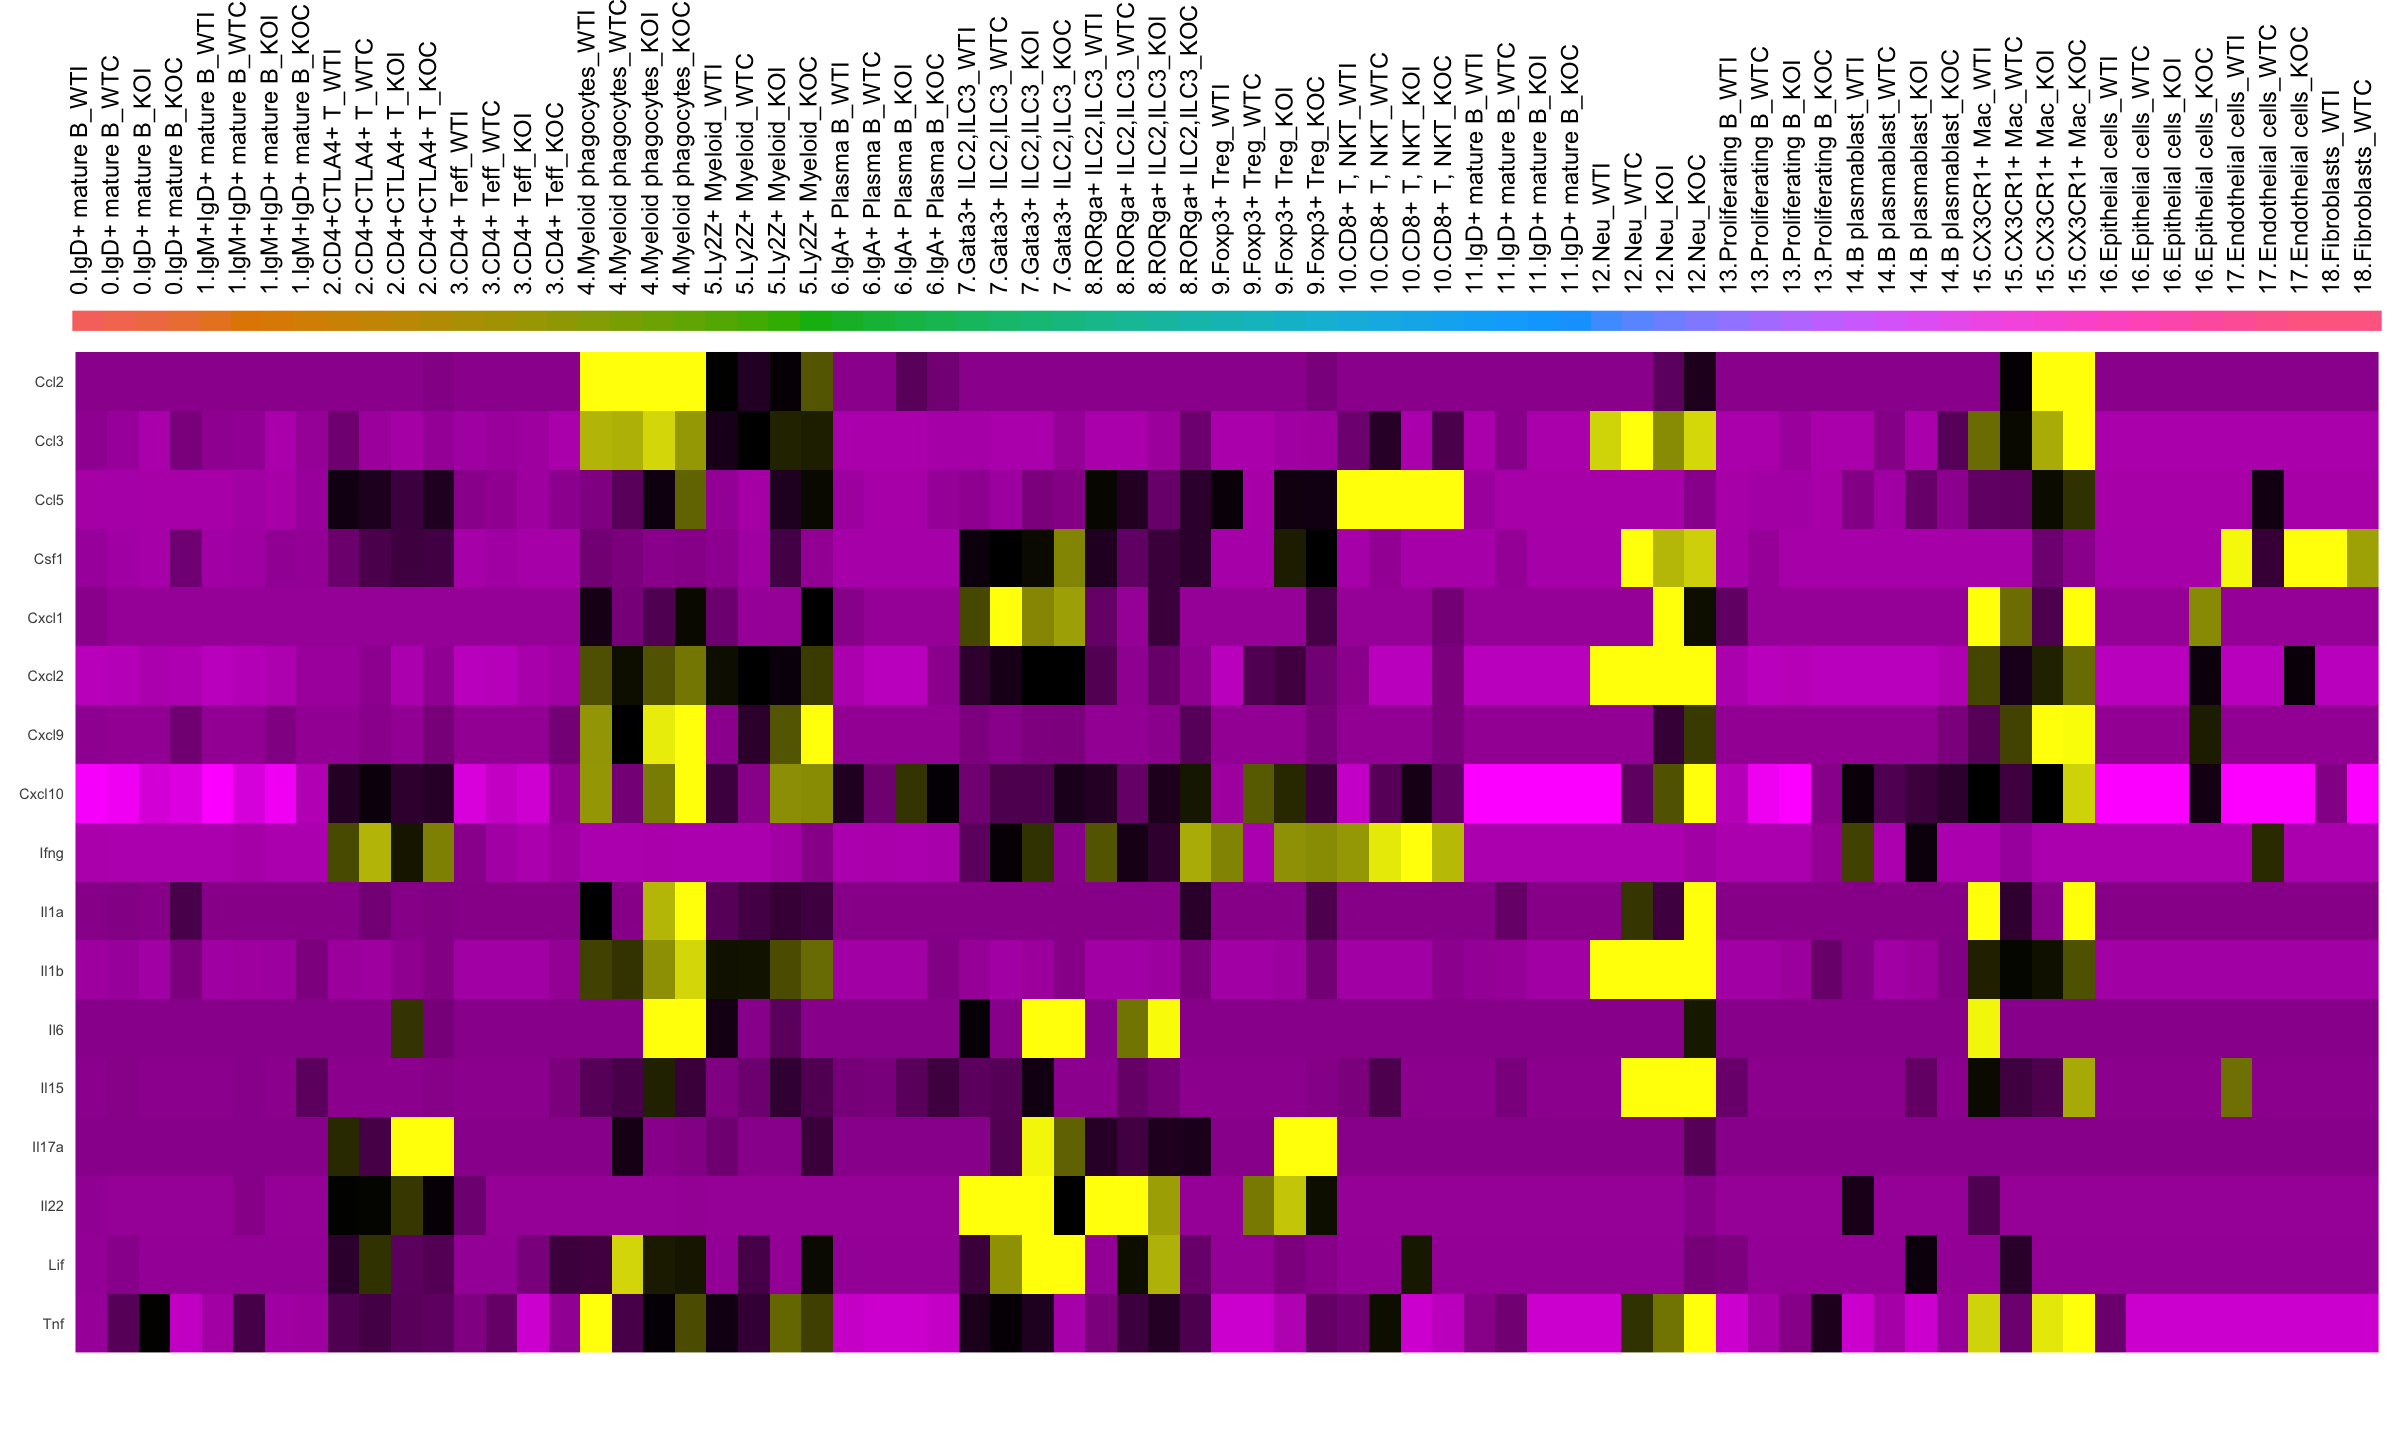

In [100]:
cytokines=c(
    "Ccl2","Ccl3","Ccl5","Csf1","Cxcl1","Cxcl2",
    "Cxcl9","Cxcl10","Ifng","Il1a","Il1b","Il6","Il15","Il17a",
    "Il22","Lif","Tnf"
)
options(repr.plot.width=20, repr.plot.height=12)
DoHeatmap(immune.combined.bulk, features = cytokines,draw.lines = F, size=5, angle = 90)+NoLegend()
          #group.colors = c("WTI"="#000000","WTC"="#5C8924","KOI"="#0715e5","KOC"="#8e1098")) +theme(text = element_text(size = 17))#+ 
      #scale_fill_gradientn(colors = colorRampPalette(c("#0000dd", "white", "#dd0000"))(256))+theme(legend.position = "bottom")

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



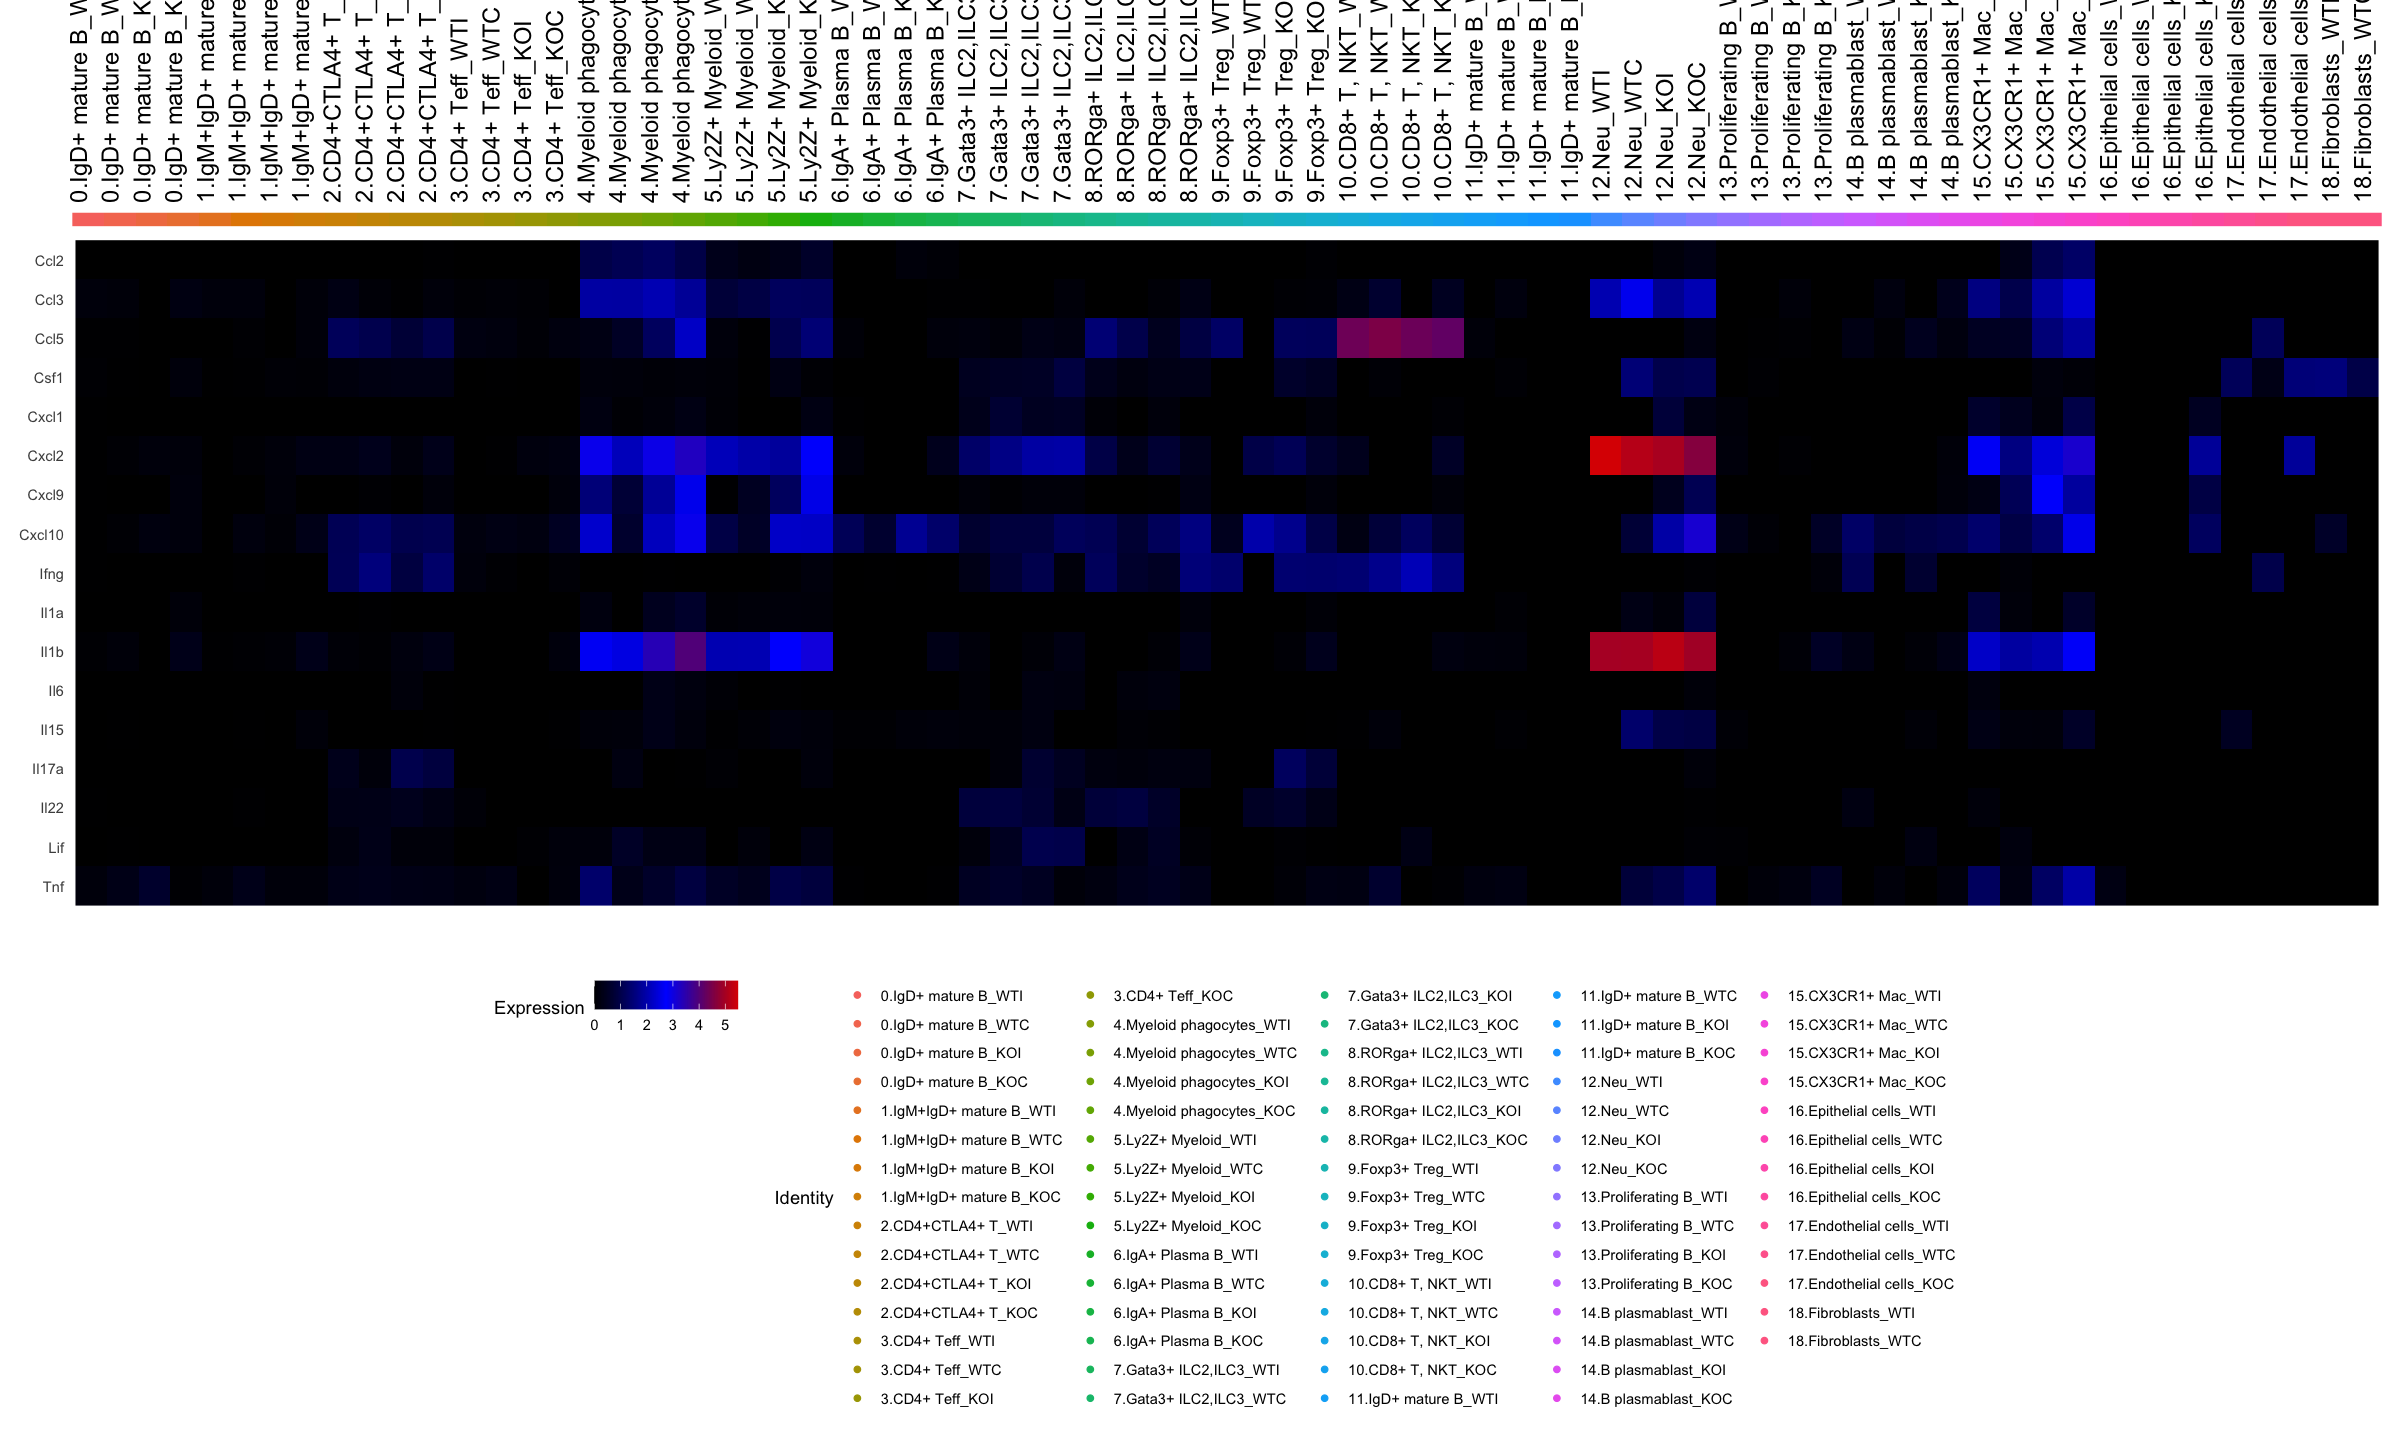

In [104]:
cytokines=c(
    "Ccl2","Ccl3","Ccl5","Csf1","Cxcl1","Cxcl2",
    "Cxcl9","Cxcl10","Ifng","Il1a","Il1b","Il6","Il15","Il17a",
    "Il22","Lif","Tnf"
)
options(repr.plot.width=20, repr.plot.height=12)
DoHeatmap(immune.combined.bulk, features = cytokines,draw.lines = F, size=5, angle = 90, slot = "data")+NoLegend()+
          #group.colors = c("WTI"="#000000","WTC"="#5C8924","KOI"="#0715e5","KOC"="#8e1098")) +theme(text = element_text(size = 17))#+ 
      scale_fill_gradientn(colors = colorRampPalette(c("black", "blue", "#dd0000"))(256))+theme(legend.position = "bottom")

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



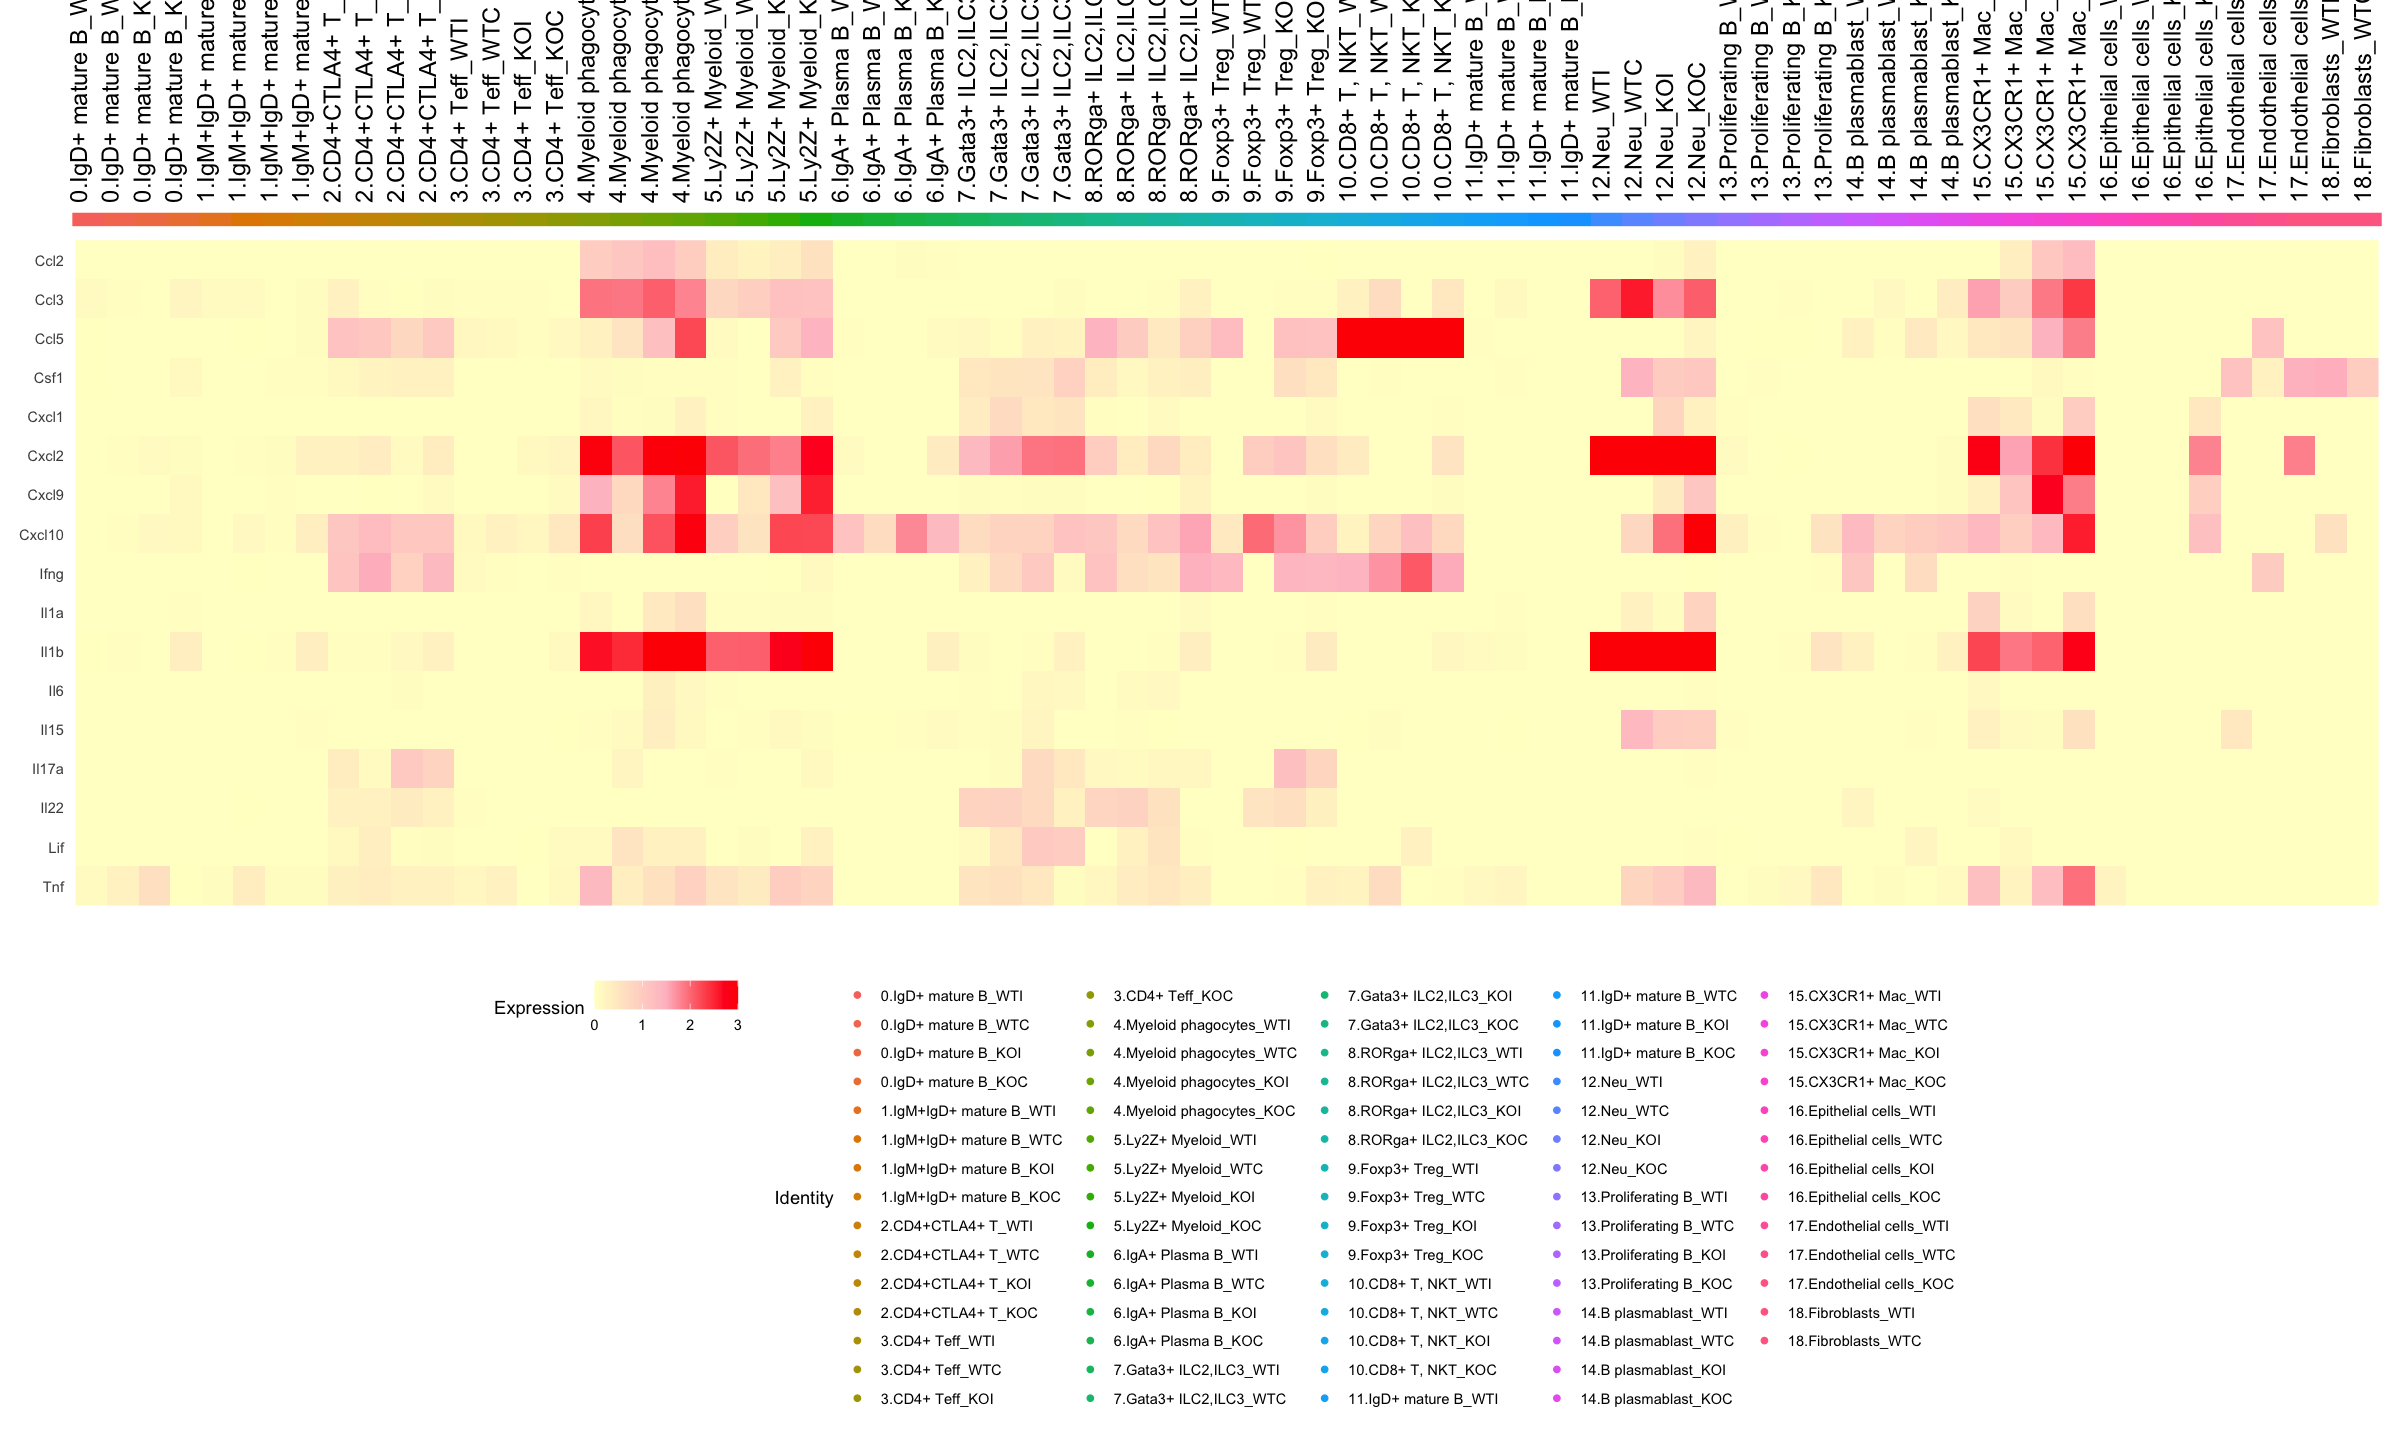

In [117]:
cytokines=c(
    "Ccl2","Ccl3","Ccl5","Csf1","Cxcl1","Cxcl2",
    "Cxcl9","Cxcl10","Ifng","Il1a","Il1b","Il6","Il15","Il17a",
    "Il22","Lif","Tnf"
)
options(repr.plot.width=20, repr.plot.height=12)
DoHeatmap(immune.combined.bulk, features = cytokines,draw.lines = F, size=5, angle = 90, slot = "data", disp.max = 3)+NoLegend()+
          #group.colors = c("WTI"="#000000","WTC"="#5C8924","KOI"="#0715e5","KOC"="#8e1098")) +theme(text = element_text(size = 17))#+ 
      scale_fill_gradientn(colors = colorRampPalette(c("#FFFFCC", "pink", "red"))(64))+theme(legend.position = "bottom")

In [124]:
cellorder=c('0.IgD+ mature B_WTI',
'0.IgD+ mature B_WTC',
'0.IgD+ mature B_KOI',
'0.IgD+ mature B_KOC',
'1.IgM+IgD+ mature B_WTI',
'1.IgM+IgD+ mature B_WTC',
'1.IgM+IgD+ mature B_KOI',
'1.IgM+IgD+ mature B_KOC',
'2.CD4+CTLA4+ T_WTI',
'2.CD4+CTLA4+ T_WTC',
'2.CD4+CTLA4+ T_KOI',
'2.CD4+CTLA4+ T_KOC',
'3.CD4+ Teff_WTI',
'3.CD4+ Teff_WTC',
'3.CD4+ Teff_KOI',
'3.CD4+ Teff_KOC',
'4.Myeloid phagocytes_WTI',
'4.Myeloid phagocytes_WTC',
'4.Myeloid phagocytes_KOI',
'4.Myeloid phagocytes_KOC',
'5.Ly2Z+ Myeloid_WTI',
'5.Ly2Z+ Myeloid_WTC',
'5.Ly2Z+ Myeloid_KOI',
'5.Ly2Z+ Myeloid_KOC',
'6.IgA+ Plasma B_WTI',
'6.IgA+ Plasma B_WTC',
'6.IgA+ Plasma B_KOI',
'6.IgA+ Plasma B_KOC',
'7.Gata3+ ILC2,ILC3_WTI',
'7.Gata3+ ILC2,ILC3_WTC',
'7.Gata3+ ILC2,ILC3_KOI',
'7.Gata3+ ILC2,ILC3_KOC',
'8.RORga+ ILC2,ILC3_WTI',
'8.RORga+ ILC2,ILC3_WTC',
'8.RORga+ ILC2,ILC3_KOI',
'8.RORga+ ILC2,ILC3_KOC',
'9.Foxp3+ Treg_WTI',
'9.Foxp3+ Treg_WTC',
'9.Foxp3+ Treg_KOI',
'9.Foxp3+ Treg_KOC',
'10.CD8+ T, NKT_WTI',
'10.CD8+ T, NKT_WTC',
'10.CD8+ T, NKT_KOI',
'10.CD8+ T, NKT_KOC',
'11.IgD+ mature B_WTI',
'11.IgD+ mature B_WTC',
'11.IgD+ mature B_KOI',
'11.IgD+ mature B_KOC',
'12.Neu_WTI',
'12.Neu_WTC',
'12.Neu_KOI',
'12.Neu_KOC',
'13.Proliferating B_WTI',
'13.Proliferating B_WTC',
'13.Proliferating B_KOI',
'13.Proliferating B_KOC',
'14.B plasmablast_WTI',
'14.B plasmablast_WTC',
'14.B plasmablast_KOI',
'14.B plasmablast_KOC',
'15.CX3CR1+ Mac_WTI',
'15.CX3CR1+ Mac_WTC',
'15.CX3CR1+ Mac_KOI',
'15.CX3CR1+ Mac_KOC',
'16.Epithelial cells_WTI',
'16.Epithelial cells_WTC',
'16.Epithelial cells_KOI',
'16.Epithelial cells_KOC',
'17.Endothelial cells_WTI',
'17.Endothelial cells_WTC',
'17.Endothelial cells_KOC',
'18.Fibroblasts_WTI',
'18.Fibroblasts_WTC')

write.csv(as.data.frame(immune.combined.bulk@assays$RNA@data[cytokines,cellorder]), file="cytokines.numeric.csv")

In [11]:
Idents(immune.combined)<-"celltype0627_stim"
levels(immune.combined)<-c('0.IgD+ mature B_WTI',
'0.IgD+ mature B_WTC',
'0.IgD+ mature B_KOI',
'0.IgD+ mature B_KOC',
'1.IgM+IgD+ mature B_WTI',
'1.IgM+IgD+ mature B_WTC',
'1.IgM+IgD+ mature B_KOI',
'1.IgM+IgD+ mature B_KOC',
'2.CD4+CTLA4+ T_WTI',
'2.CD4+CTLA4+ T_WTC',
'2.CD4+CTLA4+ T_KOI',
'2.CD4+CTLA4+ T_KOC',
'3.CD4+ Teff_WTI',
'3.CD4+ Teff_WTC',
'3.CD4+ Teff_KOI',
'3.CD4+ Teff_KOC',
'4.Myeloid phagocytes_WTI',
'4.Myeloid phagocytes_WTC',
'4.Myeloid phagocytes_KOI',
'4.Myeloid phagocytes_KOC',
'5.Ly2Z+ Myeloid_WTI',
'5.Ly2Z+ Myeloid_WTC',
'5.Ly2Z+ Myeloid_KOI',
'5.Ly2Z+ Myeloid_KOC',
'6.IgA+ Plasma B_WTI',
'6.IgA+ Plasma B_WTC',
'6.IgA+ Plasma B_KOI',
'6.IgA+ Plasma B_KOC',
'7.Gata3+ ILC2,ILC3_WTI',
'7.Gata3+ ILC2,ILC3_WTC',
'7.Gata3+ ILC2,ILC3_KOI',
'7.Gata3+ ILC2,ILC3_KOC',
'8.RORga+ ILC2,ILC3_WTI',
'8.RORga+ ILC2,ILC3_WTC',
'8.RORga+ ILC2,ILC3_KOI',
'8.RORga+ ILC2,ILC3_KOC',
'9.Foxp3+ Treg_WTI',
'9.Foxp3+ Treg_WTC',
'9.Foxp3+ Treg_KOI',
'9.Foxp3+ Treg_KOC',
'10.CD8+ T, NKT_WTI',
'10.CD8+ T, NKT_WTC',
'10.CD8+ T, NKT_KOI',
'10.CD8+ T, NKT_KOC',
'11.IgD+ mature B_WTI',
'11.IgD+ mature B_WTC',
'11.IgD+ mature B_KOI',
'11.IgD+ mature B_KOC',
'12.Neu_WTI',
'12.Neu_WTC',
'12.Neu_KOI',
'12.Neu_KOC',
'13.Proliferating B_WTI',
'13.Proliferating B_WTC',
'13.Proliferating B_KOI',
'13.Proliferating B_KOC',
'14.B plasmablast_WTI',
'14.B plasmablast_WTC',
'14.B plasmablast_KOI',
'14.B plasmablast_KOC',
'15.CX3CR1+ Mac_WTI',
'15.CX3CR1+ Mac_WTC',
'15.CX3CR1+ Mac_KOI',
'15.CX3CR1+ Mac_KOC',
'16.Epithelial cells_WTI',
'16.Epithelial cells_WTC',
'16.Epithelial cells_KOI',
'16.Epithelial cells_KOC',
'17.Endothelial cells_WTI',
'17.Endothelial cells_WTC',
'17.Endothelial cells_KOC',
'18.Fibroblasts_WTI',
'18.Fibroblasts_WTC')



cytokines=c(
    "Ccl2","Ccl3","Ccl5","Csf1","Cxcl1","Cxcl2",
    "Cxcl9","Cxcl10","Ifng","Il1a","Il1b","Il6","Il15","Il17a",
    "Il22","Lif","Tnf"
)

for (celltype in c('0.IgD+ mature B','1.IgM+IgD+ mature B','2.CD4+CTLA4+ T','3.CD4+ Teff',
    '4.Myeloid phagocytes','5.Ly2Z+ Myeloid','6.IgA+ Plasma B','7.Gata3+ ILC2,ILC3',
    '8.RORga+ ILC2,ILC3','9.Foxp3+ Treg','10.CD8+ T, NKT','11.IgD+ mature B','12.Neu',
    '13.Proliferating B','14.B plasmablast','15.CX3CR1+ Mac')){
    sub=subset(immune.combined, `celltype0627`==celltype)
    Idents(sub) <-"stim"
    
    plot=DotPlot(sub, dot.scale = 14,features=cytokines,cols=c("lightgrey", "red"))+ theme(axis.text.x = element_text(angle = 90, hjust=1))
    
    filename= paste("/Users/yzhou14/Data_local/20200802 with Sijie for fig/cytokine dotplots/",celltype,"_stim_dotplot.pdf",sep="")
    print(filename)    
    pdf(file=filename,width=10, height=4)
    print(plot)
    dev.off()
    
}

[1] "/Users/yzhou14/Data_local/20200802 with Sijie for fig/cytokine dotplots/0.IgD+ mature B_stim_dotplot.pdf"
[1] "/Users/yzhou14/Data_local/20200802 with Sijie for fig/cytokine dotplots/1.IgM+IgD+ mature B_stim_dotplot.pdf"
[1] "/Users/yzhou14/Data_local/20200802 with Sijie for fig/cytokine dotplots/2.CD4+CTLA4+ T_stim_dotplot.pdf"
[1] "/Users/yzhou14/Data_local/20200802 with Sijie for fig/cytokine dotplots/3.CD4+ Teff_stim_dotplot.pdf"
[1] "/Users/yzhou14/Data_local/20200802 with Sijie for fig/cytokine dotplots/4.Myeloid phagocytes_stim_dotplot.pdf"
[1] "/Users/yzhou14/Data_local/20200802 with Sijie for fig/cytokine dotplots/5.Ly2Z+ Myeloid_stim_dotplot.pdf"
[1] "/Users/yzhou14/Data_local/20200802 with Sijie for fig/cytokine dotplots/6.IgA+ Plasma B_stim_dotplot.pdf"
[1] "/Users/yzhou14/Data_local/20200802 with Sijie for fig/cytokine dotplots/7.Gata3+ ILC2,ILC3_stim_dotplot.pdf"
[1] "/Users/yzhou14/Data_local/20200802 with Sijie for fig/cytokine dotplots/8.RORga+ ILC2,ILC3_stim_dotp

In [144]:
sub=subset(immune.combined, celltype0627!="16.Epithelial cells" &
celltype0627!="17.Endothelial cells"&
celltype0627!="18.Fibroblasts")

In [155]:
options(repr.plot.width=10, repr.plot.height=15)
pdf(width = 10, height=15, file="/Users/yzhou14/Data_local/20200802 with Sijie for fig/cytokine dotplots/total.pdf")
DotPlot(sub, features=cytokines,cols=c("lightgrey", "red"))+ theme(axis.text.x = element_text(angle = 90, hjust=1))
dev.off()

pdf 
  2

In [163]:
Idents(immune.combined)<-"celltype0627_stim"
levels(immune.combined)<-c('0.IgD+ mature B_WTI',
'0.IgD+ mature B_WTC',
'0.IgD+ mature B_KOI',
'0.IgD+ mature B_KOC',
'1.IgM+IgD+ mature B_WTI',
'1.IgM+IgD+ mature B_WTC',
'1.IgM+IgD+ mature B_KOI',
'1.IgM+IgD+ mature B_KOC',
'2.CD4+CTLA4+ T_WTI',
'2.CD4+CTLA4+ T_WTC',
'2.CD4+CTLA4+ T_KOI',
'2.CD4+CTLA4+ T_KOC',
'3.CD4+ Teff_WTI',
'3.CD4+ Teff_WTC',
'3.CD4+ Teff_KOI',
'3.CD4+ Teff_KOC',
'4.Myeloid phagocytes_WTI',
'4.Myeloid phagocytes_WTC',
'4.Myeloid phagocytes_KOI',
'4.Myeloid phagocytes_KOC',
'5.Ly2Z+ Myeloid_WTI',
'5.Ly2Z+ Myeloid_WTC',
'5.Ly2Z+ Myeloid_KOI',
'5.Ly2Z+ Myeloid_KOC',
'6.IgA+ Plasma B_WTI',
'6.IgA+ Plasma B_WTC',
'6.IgA+ Plasma B_KOI',
'6.IgA+ Plasma B_KOC',
'7.Gata3+ ILC2,ILC3_WTI',
'7.Gata3+ ILC2,ILC3_WTC',
'7.Gata3+ ILC2,ILC3_KOI',
'7.Gata3+ ILC2,ILC3_KOC',
'8.RORga+ ILC2,ILC3_WTI',
'8.RORga+ ILC2,ILC3_WTC',
'8.RORga+ ILC2,ILC3_KOI',
'8.RORga+ ILC2,ILC3_KOC',
'9.Foxp3+ Treg_WTI',
'9.Foxp3+ Treg_WTC',
'9.Foxp3+ Treg_KOI',
'9.Foxp3+ Treg_KOC',
'10.CD8+ T, NKT_WTI',
'10.CD8+ T, NKT_WTC',
'10.CD8+ T, NKT_KOI',
'10.CD8+ T, NKT_KOC',
'11.IgD+ mature B_WTI',
'11.IgD+ mature B_WTC',
'11.IgD+ mature B_KOI',
'11.IgD+ mature B_KOC',
'12.Neu_WTI',
'12.Neu_WTC',
'12.Neu_KOI',
'12.Neu_KOC',
'13.Proliferating B_WTI',
'13.Proliferating B_WTC',
'13.Proliferating B_KOI',
'13.Proliferating B_KOC',
'14.B plasmablast_WTI',
'14.B plasmablast_WTC',
'14.B plasmablast_KOI',
'14.B plasmablast_KOC',
'15.CX3CR1+ Mac_WTI',
'15.CX3CR1+ Mac_WTC',
'15.CX3CR1+ Mac_KOI',
'15.CX3CR1+ Mac_KOC',
'16.Epithelial cells_WTI',
'16.Epithelial cells_WTC',
'16.Epithelial cells_KOI',
'16.Epithelial cells_KOC',
'17.Endothelial cells_WTI',
'17.Endothelial cells_WTC',
'17.Endothelial cells_KOC',
'18.Fibroblasts_WTI',
'18.Fibroblasts_WTC')



cytokines=c(
    "Ccl2","Ccl3","Ccl5","Csf1","Cxcl1","Cxcl2",
    "Cxcl9","Cxcl10","Ifng","Il1a","Il1b","Il6","Il15","Il17a",
    "Il22","Lif","Tnf"
)

sub=subset(immune.combined, celltype0627!="16.Epithelial cells" &
celltype0627!="17.Endothelial cells"&
celltype0627!="18.Fibroblasts")

options(repr.plot.width=10, repr.plot.height=15)
pdf(width = 10, height=15, file="/Users/yzhou14/Data_local/20200802 with Sijie for fig/cytokine dotplots/total3.pdf")
DotPlot(sub, features=cytokines,cols=c("lightgrey", "red"))+ theme(axis.text.x = element_text(angle = 90, hjust=1))
dev.off()

pdf 
  2

In [19]:
Idents(immune.combined)<-"celltype0627_stim"
levels(immune.combined)<-c('0.IgD+ mature B_WTI',
'0.IgD+ mature B_WTC',
'0.IgD+ mature B_KOI',
'0.IgD+ mature B_KOC',
'1.IgM+IgD+ mature B_WTI',
'1.IgM+IgD+ mature B_WTC',
'1.IgM+IgD+ mature B_KOI',
'1.IgM+IgD+ mature B_KOC',
'2.CD4+CTLA4+ T_WTI',
'2.CD4+CTLA4+ T_WTC',
'2.CD4+CTLA4+ T_KOI',
'2.CD4+CTLA4+ T_KOC',
'3.CD4+ Teff_WTI',
'3.CD4+ Teff_WTC',
'3.CD4+ Teff_KOI',
'3.CD4+ Teff_KOC',
'4.Myeloid phagocytes_WTI',
'4.Myeloid phagocytes_WTC',
'4.Myeloid phagocytes_KOI',
'4.Myeloid phagocytes_KOC',
'5.Ly2Z+ Myeloid_WTI',
'5.Ly2Z+ Myeloid_WTC',
'5.Ly2Z+ Myeloid_KOI',
'5.Ly2Z+ Myeloid_KOC',
'6.IgA+ Plasma B_WTI',
'6.IgA+ Plasma B_WTC',
'6.IgA+ Plasma B_KOI',
'6.IgA+ Plasma B_KOC',
'7.Gata3+ ILC2,ILC3_WTI',
'7.Gata3+ ILC2,ILC3_WTC',
'7.Gata3+ ILC2,ILC3_KOI',
'7.Gata3+ ILC2,ILC3_KOC',
'8.RORga+ ILC2,ILC3_WTI',
'8.RORga+ ILC2,ILC3_WTC',
'8.RORga+ ILC2,ILC3_KOI',
'8.RORga+ ILC2,ILC3_KOC',
'9.Foxp3+ Treg_WTI',
'9.Foxp3+ Treg_WTC',
'9.Foxp3+ Treg_KOI',
'9.Foxp3+ Treg_KOC',
'10.CD8+ T, NKT_WTI',
'10.CD8+ T, NKT_WTC',
'10.CD8+ T, NKT_KOI',
'10.CD8+ T, NKT_KOC',
'11.IgD+ mature B_WTI',
'11.IgD+ mature B_WTC',
'11.IgD+ mature B_KOI',
'11.IgD+ mature B_KOC',
'12.Neu_WTI',
'12.Neu_WTC',
'12.Neu_KOI',
'12.Neu_KOC',
'13.Proliferating B_WTI',
'13.Proliferating B_WTC',
'13.Proliferating B_KOI',
'13.Proliferating B_KOC',
'14.B plasmablast_WTI',
'14.B plasmablast_WTC',
'14.B plasmablast_KOI',
'14.B plasmablast_KOC',
'15.CX3CR1+ Mac_WTI',
'15.CX3CR1+ Mac_WTC',
'15.CX3CR1+ Mac_KOI',
'15.CX3CR1+ Mac_KOC',
'16.Epithelial cells_WTI',
'16.Epithelial cells_WTC',
'16.Epithelial cells_KOI',
'16.Epithelial cells_KOC',
'17.Endothelial cells_WTI',
'17.Endothelial cells_WTC',
'17.Endothelial cells_KOC',
'18.Fibroblasts_WTI',
'18.Fibroblasts_WTC')



cytokines=c(
    "Gzmk", "Gzma","Gzmb"
)

for (celltype in c('0.IgD+ mature B','1.IgM+IgD+ mature B','2.CD4+CTLA4+ T','3.CD4+ Teff',
    '4.Myeloid phagocytes','5.Ly2Z+ Myeloid','6.IgA+ Plasma B','7.Gata3+ ILC2,ILC3',
    '8.RORga+ ILC2,ILC3','9.Foxp3+ Treg','10.CD8+ T, NKT','11.IgD+ mature B','12.Neu',
    '13.Proliferating B','14.B plasmablast','15.CX3CR1+ Mac')){
    sub=subset(immune.combined, `celltype0627`==celltype)
    Idents(sub) <-"stim"
    
    plot=DotPlot(sub, dot.scale = 10,features=cytokines,cols=c("lightgrey", "red"))+ theme(axis.text.x = element_text(angle = 90, hjust=1))
    
    filename= paste("/Users/yzhou14/Data_local/20200802 with Sijie for fig/cytokine dotplots/",celltype,"_stim_dotplot.pdf",sep="")
    print(filename)    
    pdf(file=filename,width=5, height=4)
    print(plot)
    dev.off()
    
}

[1] "/Users/yzhou14/Data_local/20200802 with Sijie for fig/cytokine dotplots/0.IgD+ mature B_stim_dotplot.pdf"
[1] "/Users/yzhou14/Data_local/20200802 with Sijie for fig/cytokine dotplots/1.IgM+IgD+ mature B_stim_dotplot.pdf"
[1] "/Users/yzhou14/Data_local/20200802 with Sijie for fig/cytokine dotplots/2.CD4+CTLA4+ T_stim_dotplot.pdf"
[1] "/Users/yzhou14/Data_local/20200802 with Sijie for fig/cytokine dotplots/3.CD4+ Teff_stim_dotplot.pdf"
[1] "/Users/yzhou14/Data_local/20200802 with Sijie for fig/cytokine dotplots/4.Myeloid phagocytes_stim_dotplot.pdf"
[1] "/Users/yzhou14/Data_local/20200802 with Sijie for fig/cytokine dotplots/5.Ly2Z+ Myeloid_stim_dotplot.pdf"
[1] "/Users/yzhou14/Data_local/20200802 with Sijie for fig/cytokine dotplots/6.IgA+ Plasma B_stim_dotplot.pdf"
[1] "/Users/yzhou14/Data_local/20200802 with Sijie for fig/cytokine dotplots/7.Gata3+ ILC2,ILC3_stim_dotplot.pdf"
[1] "/Users/yzhou14/Data_local/20200802 with Sijie for fig/cytokine dotplots/8.RORga+ ILC2,ILC3_stim_dotp

In [24]:
Idents(immune.combined)<-"celltype0627_stim"
levels(immune.combined)<-c('0.IgD+ mature B_WTI',
'0.IgD+ mature B_WTC',
'0.IgD+ mature B_KOI',
'0.IgD+ mature B_KOC',
'1.IgM+IgD+ mature B_WTI',
'1.IgM+IgD+ mature B_WTC',
'1.IgM+IgD+ mature B_KOI',
'1.IgM+IgD+ mature B_KOC',
'2.CD4+CTLA4+ T_WTI',
'2.CD4+CTLA4+ T_WTC',
'2.CD4+CTLA4+ T_KOI',
'2.CD4+CTLA4+ T_KOC',
'3.CD4+ Teff_WTI',
'3.CD4+ Teff_WTC',
'3.CD4+ Teff_KOI',
'3.CD4+ Teff_KOC',
'4.Myeloid phagocytes_WTI',
'4.Myeloid phagocytes_WTC',
'4.Myeloid phagocytes_KOI',
'4.Myeloid phagocytes_KOC',
'5.Ly2Z+ Myeloid_WTI',
'5.Ly2Z+ Myeloid_WTC',
'5.Ly2Z+ Myeloid_KOI',
'5.Ly2Z+ Myeloid_KOC',
'6.IgA+ Plasma B_WTI',
'6.IgA+ Plasma B_WTC',
'6.IgA+ Plasma B_KOI',
'6.IgA+ Plasma B_KOC',
'7.Gata3+ ILC2,ILC3_WTI',
'7.Gata3+ ILC2,ILC3_WTC',
'7.Gata3+ ILC2,ILC3_KOI',
'7.Gata3+ ILC2,ILC3_KOC',
'8.RORga+ ILC2,ILC3_WTI',
'8.RORga+ ILC2,ILC3_WTC',
'8.RORga+ ILC2,ILC3_KOI',
'8.RORga+ ILC2,ILC3_KOC',
'9.Foxp3+ Treg_WTI',
'9.Foxp3+ Treg_WTC',
'9.Foxp3+ Treg_KOI',
'9.Foxp3+ Treg_KOC',
'10.CD8+ T, NKT_WTI',
'10.CD8+ T, NKT_WTC',
'10.CD8+ T, NKT_KOI',
'10.CD8+ T, NKT_KOC',
'11.IgD+ mature B_WTI',
'11.IgD+ mature B_WTC',
'11.IgD+ mature B_KOI',
'11.IgD+ mature B_KOC',
'12.Neu_WTI',
'12.Neu_WTC',
'12.Neu_KOI',
'12.Neu_KOC',
'13.Proliferating B_WTI',
'13.Proliferating B_WTC',
'13.Proliferating B_KOI',
'13.Proliferating B_KOC',
'14.B plasmablast_WTI',
'14.B plasmablast_WTC',
'14.B plasmablast_KOI',
'14.B plasmablast_KOC',
'15.CX3CR1+ Mac_WTI',
'15.CX3CR1+ Mac_WTC',
'15.CX3CR1+ Mac_KOI',
'15.CX3CR1+ Mac_KOC',
'16.Epithelial cells_WTI',
'16.Epithelial cells_WTC',
'16.Epithelial cells_KOI',
'16.Epithelial cells_KOC',
'17.Endothelial cells_WTI',
'17.Endothelial cells_WTC',
'17.Endothelial cells_KOC',
'18.Fibroblasts_WTI',
'18.Fibroblasts_WTC')



cytokines=c(
    "Ccr4", "Ccr3", "Cxcr3", "Ifnar1","Ifnar2","Ifngr1","Ifngr2", "Il17ra","Tnfrsf1a","Tnfrsf1b","Il1r2","Il1rap"
)

for (celltype in c('0.IgD+ mature B','1.IgM+IgD+ mature B','2.CD4+CTLA4+ T','3.CD4+ Teff',
    '4.Myeloid phagocytes','5.Ly2Z+ Myeloid','6.IgA+ Plasma B','7.Gata3+ ILC2,ILC3',
    '8.RORga+ ILC2,ILC3','9.Foxp3+ Treg','10.CD8+ T, NKT','11.IgD+ mature B','12.Neu',
    '13.Proliferating B','14.B plasmablast','15.CX3CR1+ Mac')){
    sub=subset(immune.combined, `celltype0627`==celltype)
    Idents(sub) <-"stim"
    
    plot=DotPlot(sub, dot.scale = 10,features=cytokines,cols=c("lightgrey", "red"))+ theme(axis.text.x = element_text(angle = 90, hjust=1))
    
    filename= paste("/Users/yzhou14/Data_local/20200802 with Sijie for fig/cytokine dotplots/",celltype,"_stim_dotplot.pdf",sep="")
    print(filename)    
    pdf(file=filename,width=7, height=4)
    print(plot)
    dev.off()
    
}

[1] "/Users/yzhou14/Data_local/20200802 with Sijie for fig/cytokine dotplots/0.IgD+ mature B_stim_dotplot.pdf"
[1] "/Users/yzhou14/Data_local/20200802 with Sijie for fig/cytokine dotplots/1.IgM+IgD+ mature B_stim_dotplot.pdf"
[1] "/Users/yzhou14/Data_local/20200802 with Sijie for fig/cytokine dotplots/2.CD4+CTLA4+ T_stim_dotplot.pdf"
[1] "/Users/yzhou14/Data_local/20200802 with Sijie for fig/cytokine dotplots/3.CD4+ Teff_stim_dotplot.pdf"
[1] "/Users/yzhou14/Data_local/20200802 with Sijie for fig/cytokine dotplots/4.Myeloid phagocytes_stim_dotplot.pdf"
[1] "/Users/yzhou14/Data_local/20200802 with Sijie for fig/cytokine dotplots/5.Ly2Z+ Myeloid_stim_dotplot.pdf"
[1] "/Users/yzhou14/Data_local/20200802 with Sijie for fig/cytokine dotplots/6.IgA+ Plasma B_stim_dotplot.pdf"
[1] "/Users/yzhou14/Data_local/20200802 with Sijie for fig/cytokine dotplots/7.Gata3+ ILC2,ILC3_stim_dotplot.pdf"
[1] "/Users/yzhou14/Data_local/20200802 with Sijie for fig/cytokine dotplots/8.RORga+ ILC2,ILC3_stim_dotp